In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()
import matplotlib.ticker as mtick

%matplotlib inline

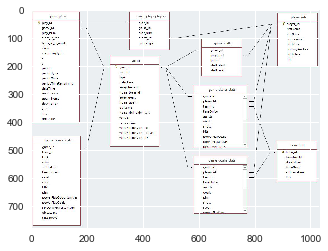

In [3]:
#Display the table relationship diagram
img=mpimg.imread('data/table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [4]:
#Read in all CSV files from repository
game = pd.read_csv('data/game.csv')
game_goalie_stats = pd.read_csv('data/game_goalie_stats.csv')
game_plays = pd.read_csv('data/game_plays.csv')
game_plays_players = pd.read_csv('data/game_plays_players.csv')
game_shifts = pd.read_csv('data/game_shifts.csv')
game_skater_stats = pd.read_csv('data/game_skater_stats.csv')
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
player_info = pd.read_csv('data/player_info.csv')
team_info = pd.read_csv('data/team_info.csv')

In [4]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [5]:
skater_team.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'franchiseId', 'shortName', 'teamName', 'abbreviation', 'link_x',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_y'],
      dtype='object')

In [6]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [7]:
game_plays.describe()

,game_id,play_num,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,2.369646e+06,2.369646e+06,1.907922e+06,1.907922e+06,1.903140e+06,1.903157e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,1.903140e+06,1.903157e+06
mean,2.014707e+09,1.648367e+02,1.762862e+01,1.755894e+01,2.861891e-01,-2.097951e-01,2.026005e+00,5.857356e+02,5.979063e+02,1.194952e+00,1.322649e+00,8.497122e+00,1.519691e-01
std,1.635618e+06,9.749416e+01,1.229775e+01,1.228052e+01,6.428901e+01,2.307910e+01,8.716109e-01,3.659118e+02,3.639756e+02,1.285669e+00,1.379465e+00,6.372565e+01,2.307955e+01
min,2.012020e+09,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013021e+09,8.200000e+01,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.650000e+02,2.820000e+02,0.000000e+00,0.000000e+00,-6.300000e+01,-2.200000e+01
50%,2.015020e+09,1.630000e+02,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00
75%,2.016021e+09,2.440000e+02,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.030000e+02,9.140000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.017030e+09,6.810000e+02,5.400000e+01,5.400000e+01,9.900000e+01,4.200000e+01,6.000000e+00,1.200000e+03,1.200000e+03,9.000000e+00,1.000000e+01,9.900000e+01,4.200000e+01


In [8]:
#merge the game home_team_id to the game_plays
game_plays = pd.merge(game_plays, game, on = 'game_id')

In [9]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

# Let's look at the top 50 players and how they perform in these various categories

In [10]:
skater_name_stats = pd.merge(game, game_skater_stats, on='game_id', how='outer')
skater_name_stats = pd.merge(skater_name_stats, player_info, on='player_id', how='outer')

In [11]:
skater_name_stats['game_category'] = 'NA'

skater_name_stats.loc[(skater_name_stats['home_team_id'] == skater_name_stats['team_id']) & 
                   (skater_name_stats['home_goals'] > skater_name_stats['away_goals']),'game_category'] = 'Home Win'

skater_name_stats.loc[(skater_name_stats['home_team_id'] == skater_name_stats['team_id']) & 
                   (skater_name_stats['home_goals'] < skater_name_stats['away_goals']),'game_category'] = 'Home Loss'

skater_name_stats.loc[(skater_name_stats['away_team_id'] == skater_name_stats['team_id']) & 
                   (skater_name_stats['away_goals'] > skater_name_stats['home_goals']),'game_category'] = 'Away Win'

skater_name_stats.loc[(skater_name_stats['away_team_id'] == skater_name_stats['team_id']) & 
                   (skater_name_stats['home_goals'] > skater_name_stats['away_goals']),'game_category'] = 'Away Loss'

In [12]:
skater_name_stats.columns

Index(['game_id', 'season', 'type', 'date_time', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz', 'player_id', 'team_id',
       'timeOnIce', 'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
       'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
       'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists',
       'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce', 'firstName', 'lastName', 'nationality',
       'birthCity', 'primaryPosition', 'birthDate', 'link', 'game_category'],
      dtype='object')

In [13]:
#Define how we will rank the players
skater_name_stats['rank']=skater_name_stats['goals']+skater_name_stats['assists']

In [14]:
#Create the list of the top 50 players
top_50_players = skater_name_stats.fillna(0)
top_50_players = top_50_players.groupby('player_id').sum()
top_50_players.sort_values('rank', ascending=False)
top_50_players = top_50_players[-50:]
top_50_players = top_50_players.reset_index()['player_id']
top_50_players = list(top_50_players)

In [15]:
skater_name_stats = skater_name_stats[skater_name_stats['player_id'].isin(top_50_players)]

In [16]:
df = skater_name_stats.groupby(['player_id','game_category']).agg({'timeOnIce':['std','mean'],
                                                        'assists':['std','mean'],
                                                       'goals':['std','mean'],
                                                       'shots':['std','mean'],
                                                        'hits':['std','mean'],
                                                        'powerPlayGoals':['std','mean'],
                                                       'powerPlayAssists':['std','mean'],
                                                       'penaltyMinutes':['std','mean'],
                                                        'penaltyMinutes':['std','mean'],
                                                       'faceOffWins':['std','mean'],
                                                       'faceoffTaken':['std','mean'],
                                                       'takeaways':['std','mean'],
                                                       'giveaways':['std','mean'],
                                                        'shortHandedGoals':['std','mean'],
                                                        'shortHandedAssists':['std','mean'],
                                                        'blocked':['std','mean'],
                                                        'plusMinus':['std','mean'],
                                                        'evenTimeOnIce':['std','mean'],
                                                        'shortHandedTimeOnIce':['std','mean'],
                                                       'powerPlayTimeOnIce':['std','mean']})

In [17]:
#Eliminate players without the game_category data
df = df.reset_index()
df = df[(df['game_category'] != 'NA')]

In [18]:
def create_boxplot_with_points(df, variable):
    plt.clf()
    sns.boxplot(x="game_category", y=(variable,'mean'), data=df.reset_index(), color='white', width=.5)
    ax = sns.swarmplot(x="game_category", y=(variable,'mean'), data=df.reset_index(), color="grey")
    ax.set_ylabel('Mean '+variable.title())
    ax.set_xlabel('')
    ax.set_title(('Mean '+variable+' compared to Game Category').title())
    #plt.ylim(0,)
    plt.savefig('figures/player_'+variable+'.jpg')
    pass

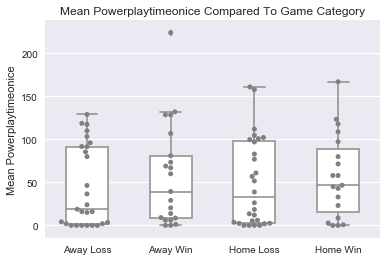

In [19]:
#Create the player plots
create_boxplot_with_points(df,'timeOnIce')
create_boxplot_with_points(df,'assists')
create_boxplot_with_points(df,'goals')
create_boxplot_with_points(df,'hits')
create_boxplot_with_points(df,'powerPlayGoals')
create_boxplot_with_points(df,'powerPlayAssists')
create_boxplot_with_points(df,'penaltyMinutes')
create_boxplot_with_points(df,'faceOffWins')
create_boxplot_with_points(df,'faceoffTaken')
create_boxplot_with_points(df,'takeaways')
create_boxplot_with_points(df,'giveaways')
create_boxplot_with_points(df,'shortHandedGoals')
create_boxplot_with_points(df,'shortHandedAssists')
create_boxplot_with_points(df,'blocked')
create_boxplot_with_points(df,'plusMinus')
create_boxplot_with_points(df,'evenTimeOnIce')
create_boxplot_with_points(df,'shortHandedTimeOnIce')
create_boxplot_with_points(df,'powerPlayTimeOnIce')

# Lets look at some Team stats for faceoff wins, hits, goals

In [20]:
#merge the game home_team_id to the game_plays
game_and_stats = pd.merge(game, game_teams_stats, on = 'game_id', how='outer')
game_and_stats = pd.merge(game_and_stats, team_info, on = 'team_id', how='inner')

In [21]:
#Find stats for home wins, losses and away wins and losses by team

In [22]:
game_and_stats['game_category'] = 'NA'

game_and_stats.loc[(game_and_stats['home_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] > game_and_stats['away_goals']),'game_category'] = 'Home Win'

game_and_stats.loc[(game_and_stats['home_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] < game_and_stats['away_goals']),'game_category'] = 'Home Loss'

game_and_stats.loc[(game_and_stats['away_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['away_goals'] > game_and_stats['home_goals']),'game_category'] = 'Away Win'

game_and_stats.loc[(game_and_stats['away_team_id'] == game_and_stats['team_id']) & 
                   (game_and_stats['home_goals'] > game_and_stats['away_goals']),'game_category'] = 'Away Loss'

In [23]:
game_and_stats.columns

Index(['game_id', 'season', 'type', 'date_time', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz', 'team_id', 'HoA', 'won',
       'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'franchiseId', 'shortName', 'teamName',
       'abbreviation', 'link', 'game_category'],
      dtype='object')

In [24]:
df = game_and_stats.groupby(['teamName','game_category']).agg({'home_goals':['std','mean'],
                                                        'away_goals':['std','mean'],
                                                       'shots':['std','mean'],
                                                       'hits':['std','mean'],
                                                        'powerPlayOpportunities':['std','mean'],
                                                        'powerPlayGoals':['std','mean'],
                                                       'faceOffWinPercentage':['std','mean'],
                                                       'giveaways':['std','mean'],
                                                       'takeaways':['std','mean']})

In [34]:
def create_boxplot_with_points(df, variable):
    plt.clf()
    sns.boxplot(x="game_category", y=(variable,'mean'), data=df.reset_index(), color='white', width=.5)
    ax = sns.swarmplot(x="game_category", y=(variable,'mean'), data=df.reset_index(), color="grey")
    ax.set_ylabel('Mean '+variable.title())
    ax.set_xlabel('')
    ax.set_title(('Mean '+variable+' compared to Game Category').title())
    #plt.ylim(0,)
    plt.savefig('figures/game_'+variable+'jpg')
    pass

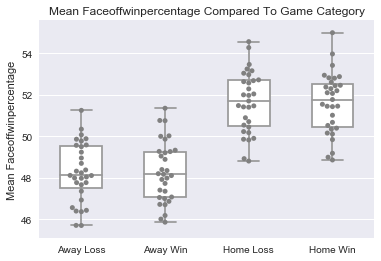

In [35]:
#Create the game plots
create_boxplot_with_points(df,'hits')
create_boxplot_with_points(df,'shots')
create_boxplot_with_points(df,'powerPlayOpportunities')
create_boxplot_with_points(df,'powerPlayGoals')
create_boxplot_with_points(df,'giveaways')
create_boxplot_with_points(df,'takeaways')
create_boxplot_with_points(df,'faceOffWinPercentage')

# Hits vs Game Category

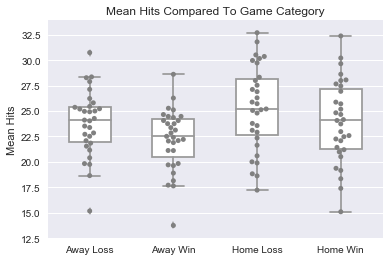

In [36]:
create_boxplot_with_points(df,'hits')

# Shots vs Game Category

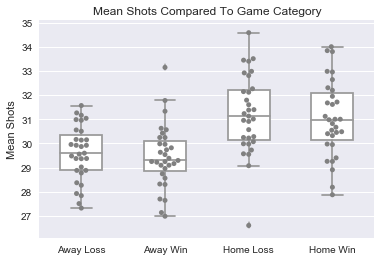

In [37]:
create_boxplot_with_points(df,'shots')

# Power Play Opportunities vs Game Category

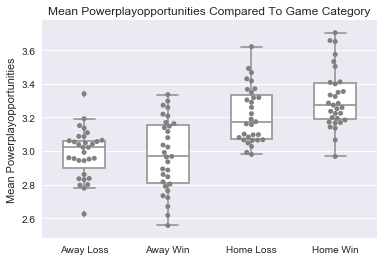

In [38]:
create_boxplot_with_points(df,'powerPlayOpportunities')

# Power Play Goals vs Game Category

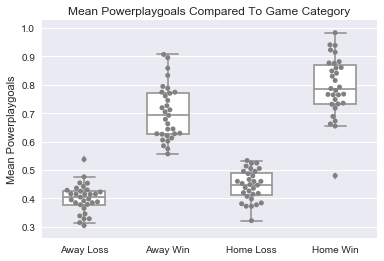

In [39]:
create_boxplot_with_points(df,'powerPlayGoals')

# Giveaways vs Game Category

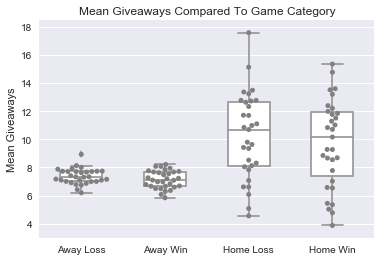

In [40]:
create_boxplot_with_points(df,'giveaways')

# Takeaways vs Game Category

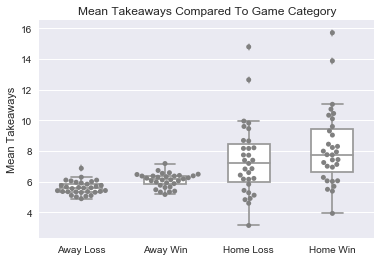

In [41]:
create_boxplot_with_points(df,'takeaways')

# Faceoff Wins vs Game Category

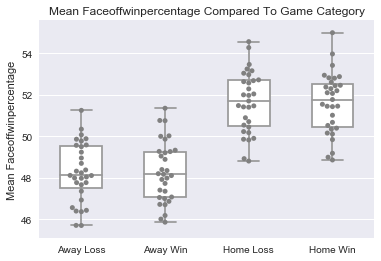

In [42]:
create_boxplot_with_points(df,'faceOffWinPercentage')

In [43]:
df.head()

home_goals           away_goals               shots  \
                                std      mean        std      mean       std   
teamName   game_category                                                       
Avalanche  Away Loss       1.451183  3.978873   1.041541  1.633803  6.254133   
           Away Win        1.107267  1.763441   1.160153  3.623656  5.284496   
           Home Loss       1.179189  1.858407   1.324786  3.938053  5.792531   
           Home Win        1.393278  3.902439   1.131027  1.821138  6.569927   
Blackhawks Away Loss       1.327240  3.953125   1.207318  1.695312  6.613146   

                                         hits             \
                               mean       std       mean   
teamName   game_category                                   
Avalanche  Away Loss      27.323944  8.694070  24.042254   
           Away Win       27.139785  8.390997  24.064516   
           Home Loss      29.548673  7.057064  22.353982   
           Home Win       31.000000  6.677686  21.430894   
Blackhawks Away Loss      30.148438  6.620309  15.171875   

                         powerPlayOpportunities           powerPlayGoals  \
                                            std      mean            std   
teamName   game_category                                                   
Avalanche  Away Loss                   1.447789  3.056338       0.517596   
           Away Win                    1.618182  2.967742       0.957000   
           Home Loss                   1.501579  3.318584       0.663287   
           Home Win                    1.528921  3.252033       0.800340   
Blackhawks Away Loss                   1.410642  2.796875       0.519075   

                                   faceOffWinPercentage            giveaways  \
                              mean                  std       mean       std   
teamName   game_category                                                       
Avalanche  Away Loss      0.338028             6.124549  46.935211  4.163644   
           Away Win       0.774194             7.032062  47.734409  3.816379   
           Home Loss      0.407080             7.822690  52.969027  3.015788   
           Home Win       0.731707             7.001675  51.017886  2.499847   
Blackhawks Away Loss      0.328125             7.288548  48.121094  4.658826   

                                   takeaways            
                              mean       std      mean  
teamName   game_category                                
Avalanche  Away Loss      7.309859  2.984828  4.887324  
           Away Win       6.978495  2.771490  5.333333  
           Home Loss      6.619469  4.046779  8.690265  
           Home Win       5.447154  3.834143  9.601626  
Blackhawks Away Loss      7.742188  3.442217  5.960938

In [44]:
corr = df.groupby('game_category').corr()

In [45]:
def make_mask(data):
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    return mask

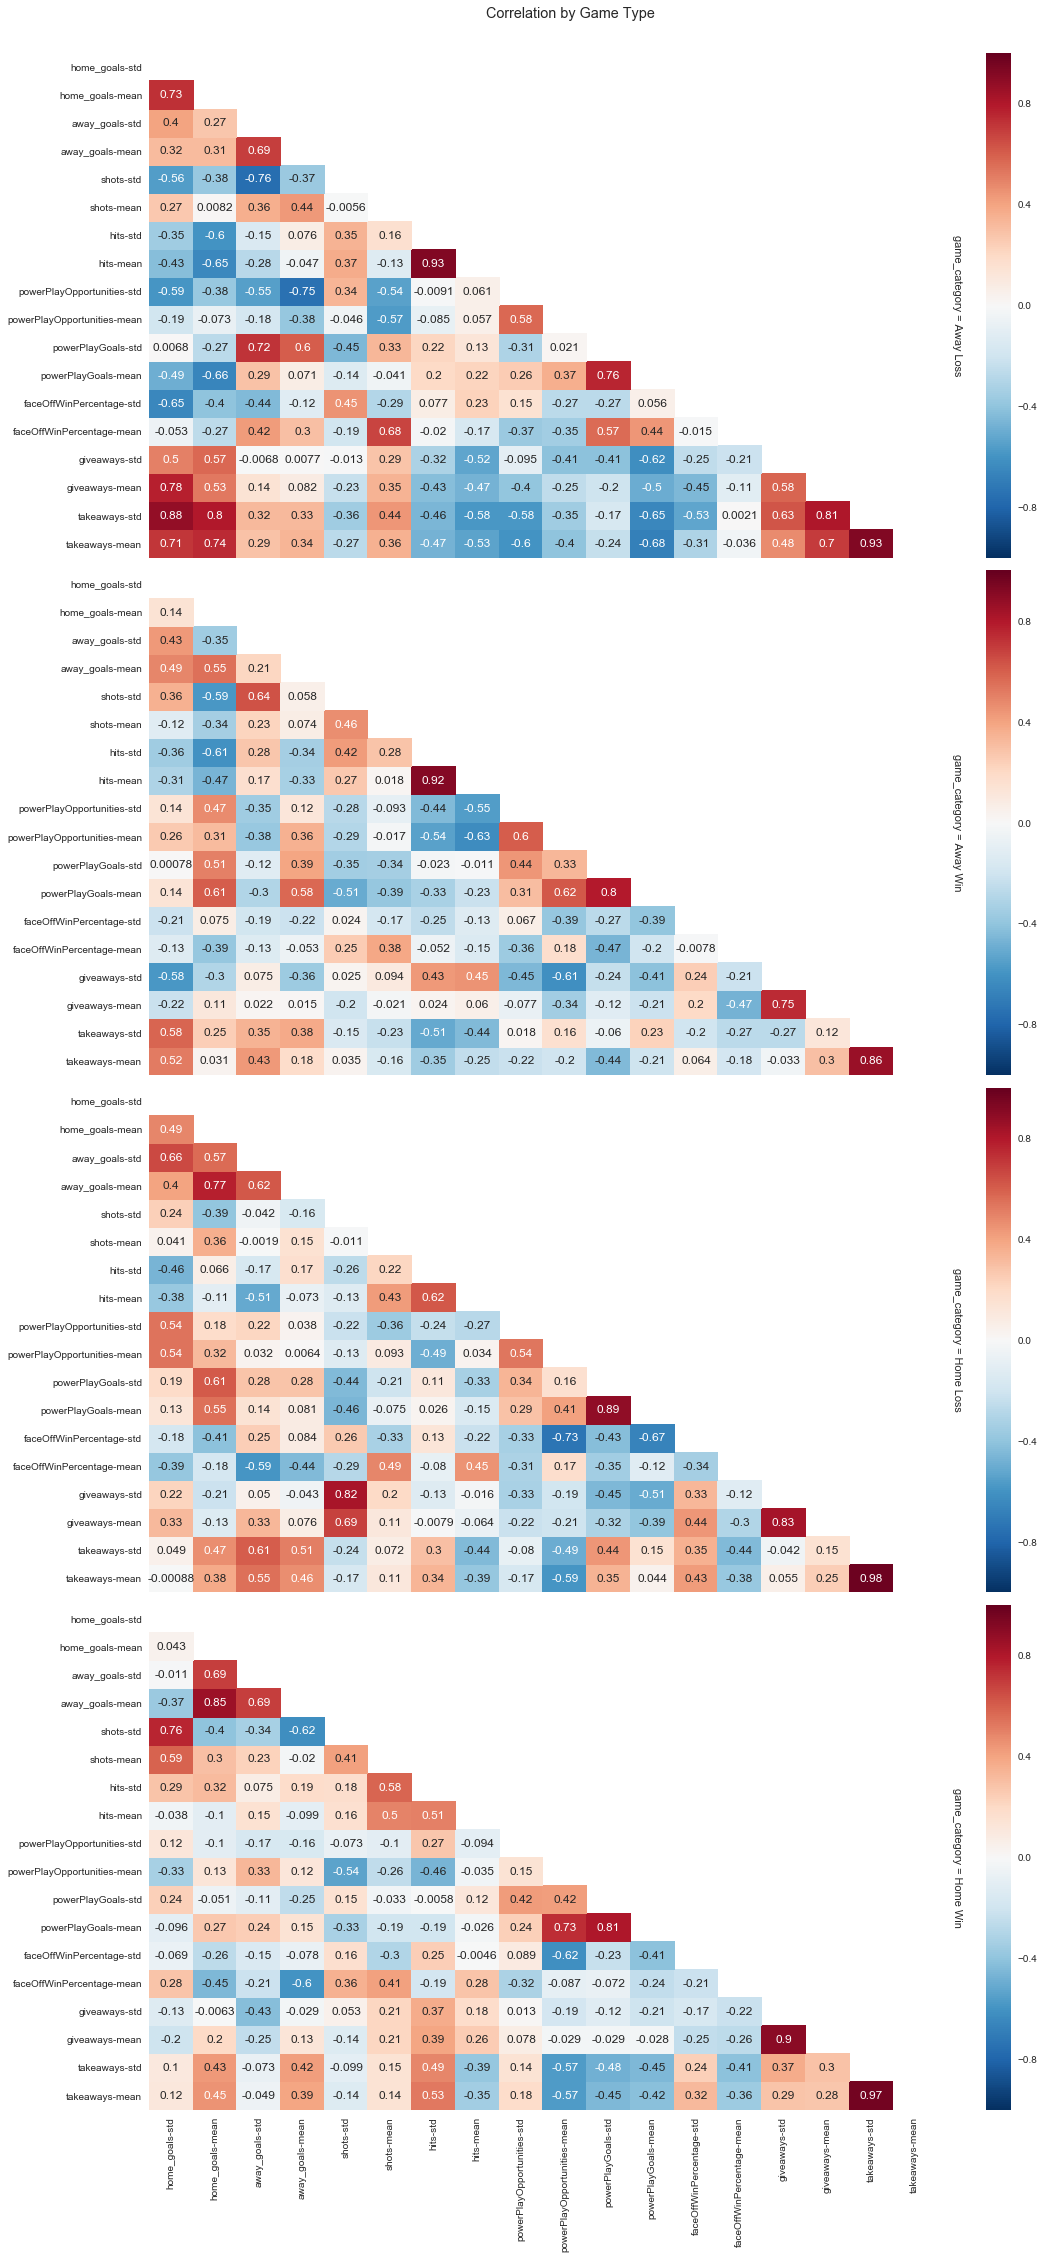

In [48]:
sns.set(style = 'white')
g = sns.FacetGrid(corr.reset_index(), row = "game_category", margin_titles=True, size=8, aspect=2)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0, mask=make_mask(data.corr()),annot=True))
plt.subplots_adjust(top=0.96)
g.fig.suptitle('Correlation by Game Type')
plt.savefig('figures/heatmap_by_category.jpg')

pass

In [47]:
#Remove nan x positions
game_plays_position = game_plays[np.isfinite(game_plays['x'])]

#Convert a column to a datetime object
game_plays_position['dateTime'] = pd.to_datetime(game_plays_position['dateTime'])
#Create column of years from datetime Series
game_plays_position['year'] = game_plays_position['dateTime'].dt.year

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [49]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
1,2013020652_61,2013020652,61,27.0,20.0,Giveaway,NaN,58.0,39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
5,2013020652_4,2013020652,4,27.0,20.0,Faceoff,NaN,0.0,0.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
6,2013020652_5,2013020652,5,27.0,20.0,Hit,NaN,90.0,-39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
7,2013020652_6,2013020652,6,20.0,27.0,Shot,Backhand,-78.0,9.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
8,2013020652_7,2013020652,7,20.0,27.0,Shot,Slap Shot,-39.0,-31.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [50]:
#Free up some memory
del game_shifts
del game_plays
del game_plays_players

In [51]:
#lets only look at hits
game_plays_goals = game_plays_position[game_plays_position['event'] == 'Goal'] 
game_plays_hits = game_plays_position[game_plays_position['event'] == 'Hit']

In [52]:
game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

In [54]:
#Seems like there is some issue with data type per some reading online.  Needs to be float not an object
cols = ['x', 'y']
game_plays_position[cols] = game_plays_position[cols].astype(float)

In [55]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
1,2013020652_61,2013020652,61,27.0,20.0,Giveaway,NaN,58.0,39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
5,2013020652_4,2013020652,4,27.0,20.0,Faceoff,NaN,0.0,0.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
6,2013020652_5,2013020652,5,27.0,20.0,Hit,NaN,90.0,-39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
7,2013020652_6,2013020652,6,20.0,27.0,Shot,Backhand,-78.0,9.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
8,2013020652_7,2013020652,7,20.0,27.0,Shot,Slap Shot,-39.0,-31.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


# Create home goals vs away goals by team

In [56]:
game_plays_position.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

In [57]:
#By season, by game_id
season_scores = game_plays_position.groupby(['year', 'game_id'])[['goals_home', 'goals_away']].max()
season_scores.groupby('year')[['goals_home', 'goals_away']].mean()

,goals_home,goals_away
year,,
2013,2.802888,2.476534
2014,2.830806,2.525140
2015,2.740941,2.516577
2016,2.803089,2.548263
2017,2.944694,2.646487
2018,3.068365,2.843164


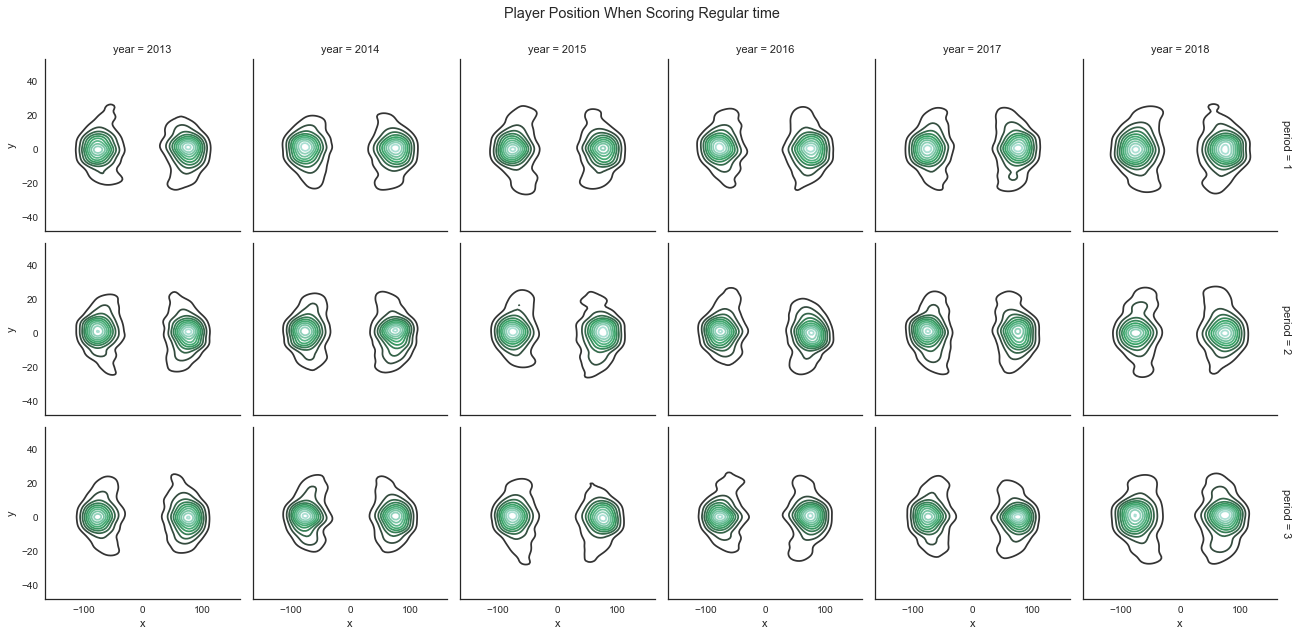

In [59]:
#Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
reg_time = game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position When Scoring Regular time')
plt.savefig('figures/kde_position_plot.jpg')

# It will be necessary to figure out how to identify the scoring team for each play.  I think thats in the gameshifts table and we can join on home team with the list of players scoring or with a regex expression

In [60]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby('teamName').agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})
goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

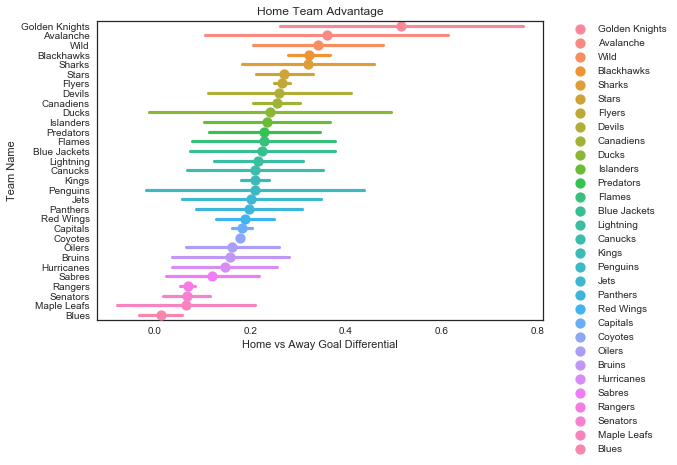

In [61]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName'], var_name='goal_differential')

#Create a plot of team & goal differentials
sns.set(style = 'white')
ax = sns.pointplot(x="value", y="teamName", hue = "teamName", data=df_long, join=False, size=8, aspect = 2)
ax.set(xlabel='Home vs Away Goal Differential', ylabel='Team Name', title = 'Home Team Advantage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('figures/goal_differential_by_team.jpg')
pass

# What if we look for advantage by year?

In [62]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['teamName','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [63]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName','year'], var_name='var_name')

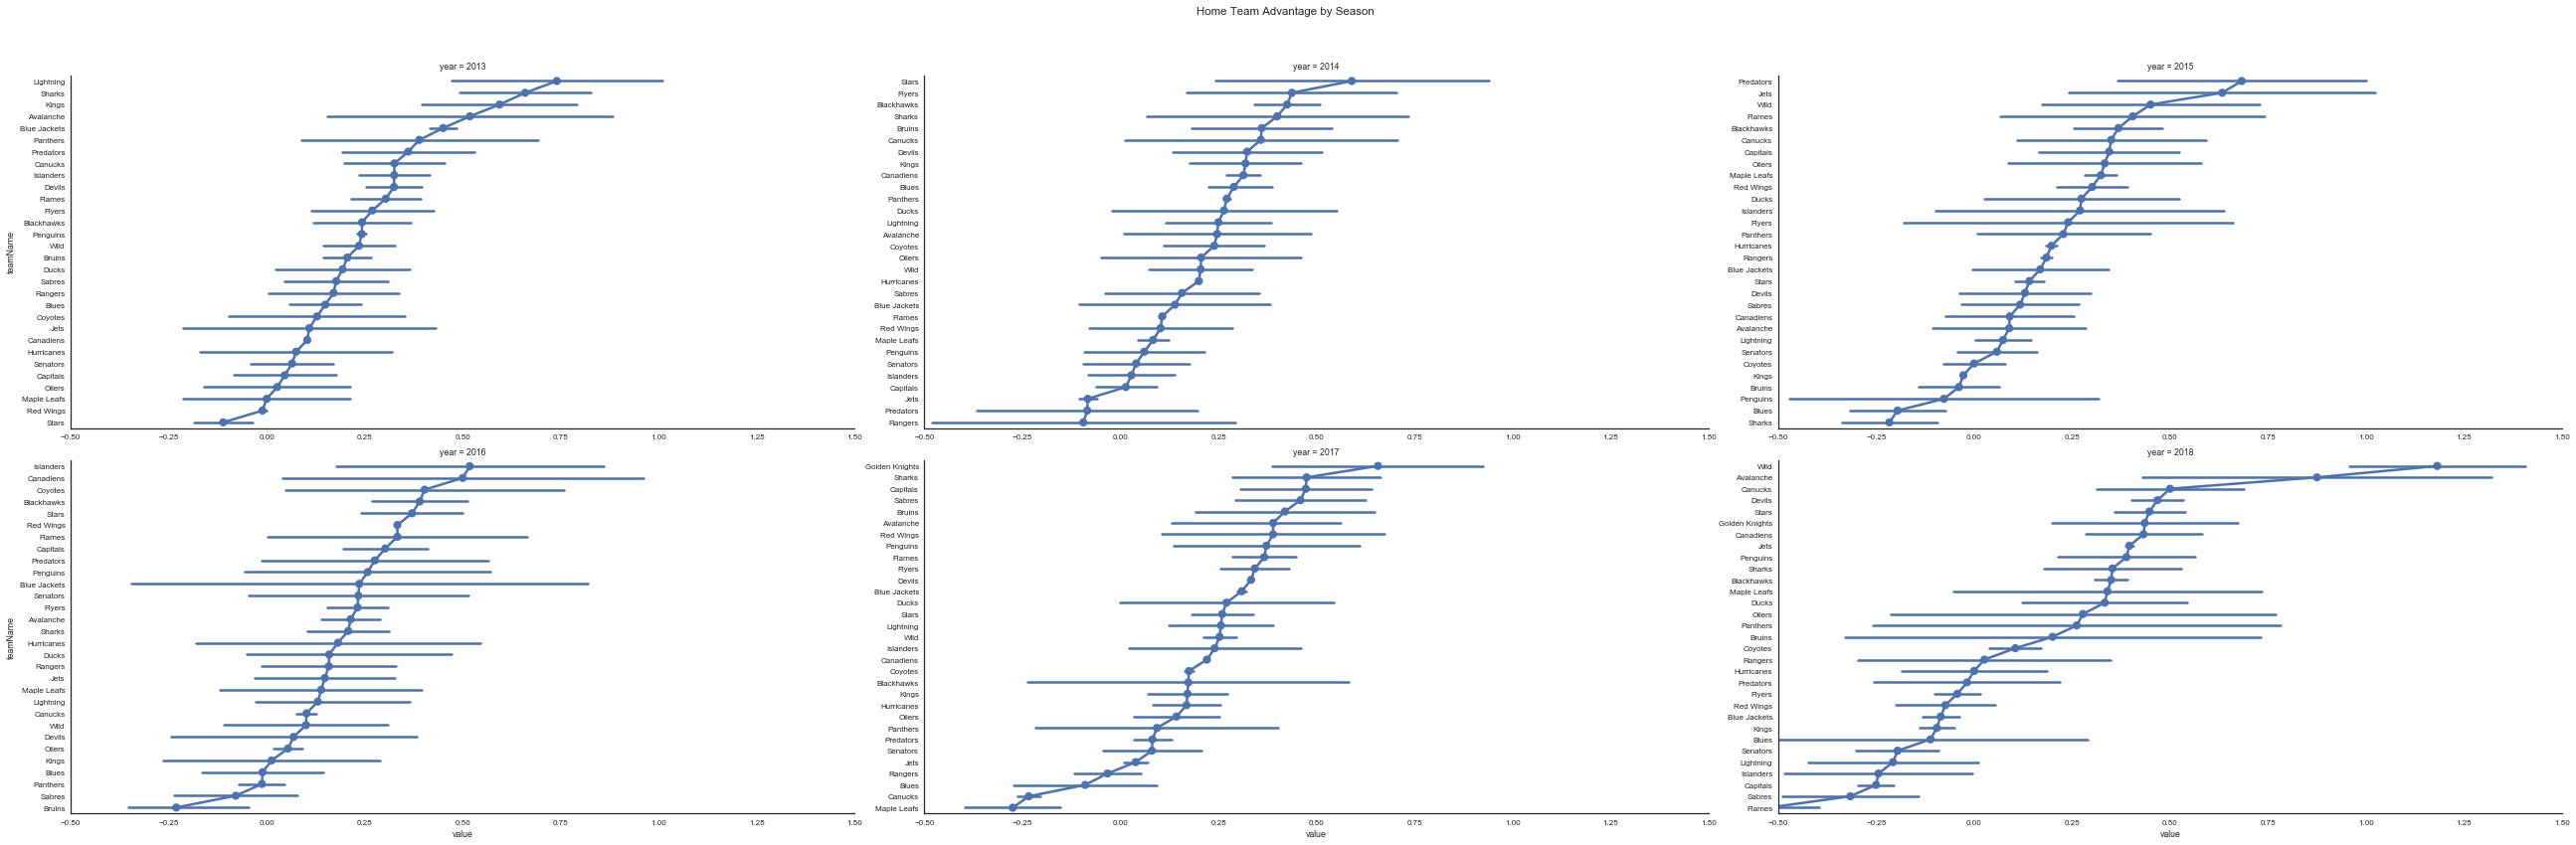

In [64]:
sns.set(style = 'white')
sns.set_context("paper") 
g = sns.FacetGrid(df_long, col = "year", margin_titles=True, size=6, aspect=2, sharey=False, sharex=False, col_wrap=3)
g.map(sns.pointplot, 'value', 'teamName')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Team Advantage by Season')
axes = g.axes
for plot in axes:
    plot.set_xlim(-0.5,1.5)
plt.savefig('figures/team_advantage_by_season.jpg')
pass

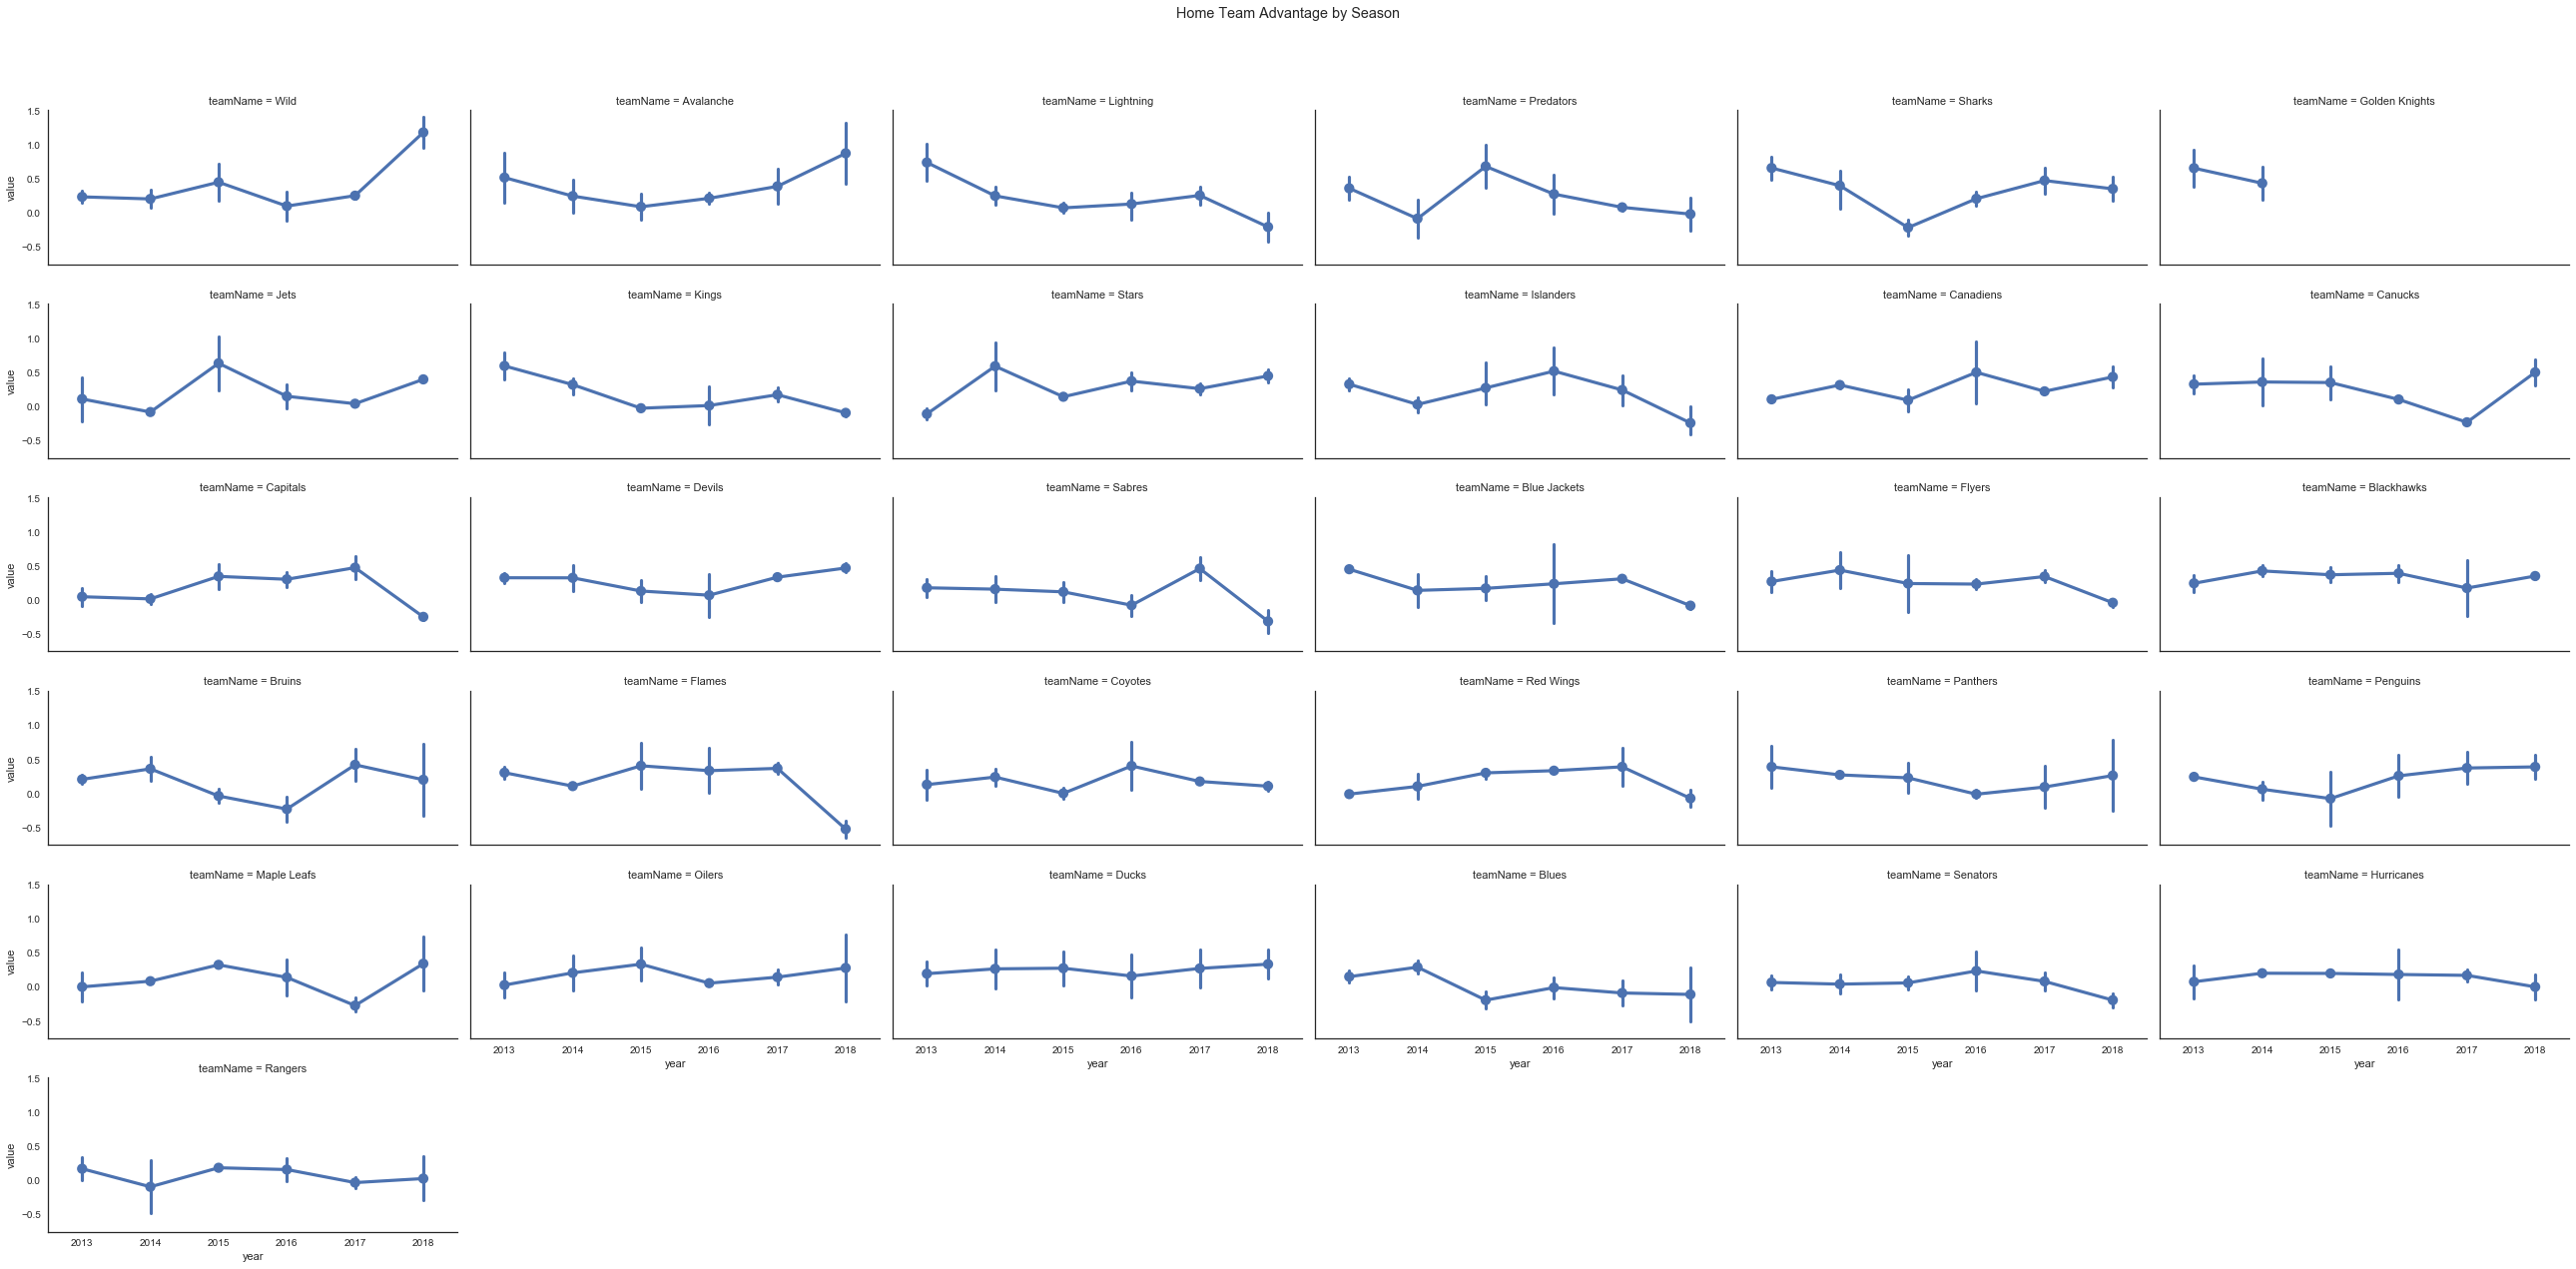

In [65]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, col = "teamName", col_wrap=6, margin_titles=True, size=3, aspect=2)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Team Advantage by Season')
plt.savefig('figures/goal_differential_by_season.jpg')
pass

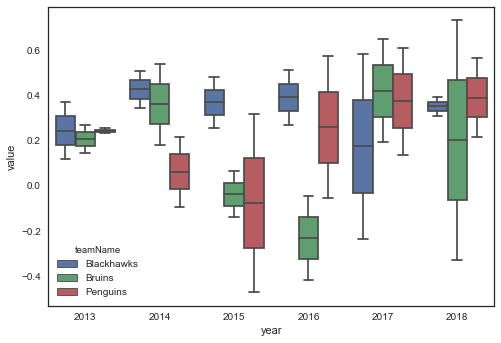

In [66]:
#Penguins Advantage by Year
sns.boxplot(x="year", y="value",
            hue="teamName",
            data=df_long[(df_long['teamName']=='Penguins') | (df_long['teamName']=='Bruins') | (df_long['teamName']=='Blackhawks')])
plt.savefig('figures/pens_bruins_blackhawks.jpg')
pass

# How does the advantage work out when we examine different venues

In [67]:
#We will now look at differences in time zones
venue_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='home_team_id', right_on='team_id')
#venue_by_team = pd.merge(venue_by_team, team_info, how='inner', left_on='home_team_id', right_on='team_id')

#Add in the venue of the away team as well
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='away_team_id', right_on='team_id')


In [68]:
#Find the venue for each team
venue_by_team = venue_by_team.groupby(['teamName','venue_time_zone_offset']).sum().reset_index()[['teamName','venue_time_zone_offset']]

In [69]:
goals_by_team = pd.merge(goals_by_team, venue_by_team, left_on='teamName', right_on='teamName')

In [70]:
goals_by_team['timezone_diff'] = goals_by_team['venue_time_zone_offset_x'] - goals_by_team['venue_time_zone_offset_y']

In [71]:
#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['timezone_diff','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [72]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['timezone_diff','year'], var_name='var_name')

In [73]:
df.head()

,timezone_diff,year,goal_differential_m1std,goal_differential,goal_differential_p1std
,,,,,
0,-3,2013,0.620736,1.145455,1.670173
1,2,2015,0.580013,0.877551,1.175089
2,-1,2018,0.581928,0.725275,0.868622
3,2,2016,0.094131,0.611111,1.128091
4,-1,2013,0.365301,0.609195,0.853089


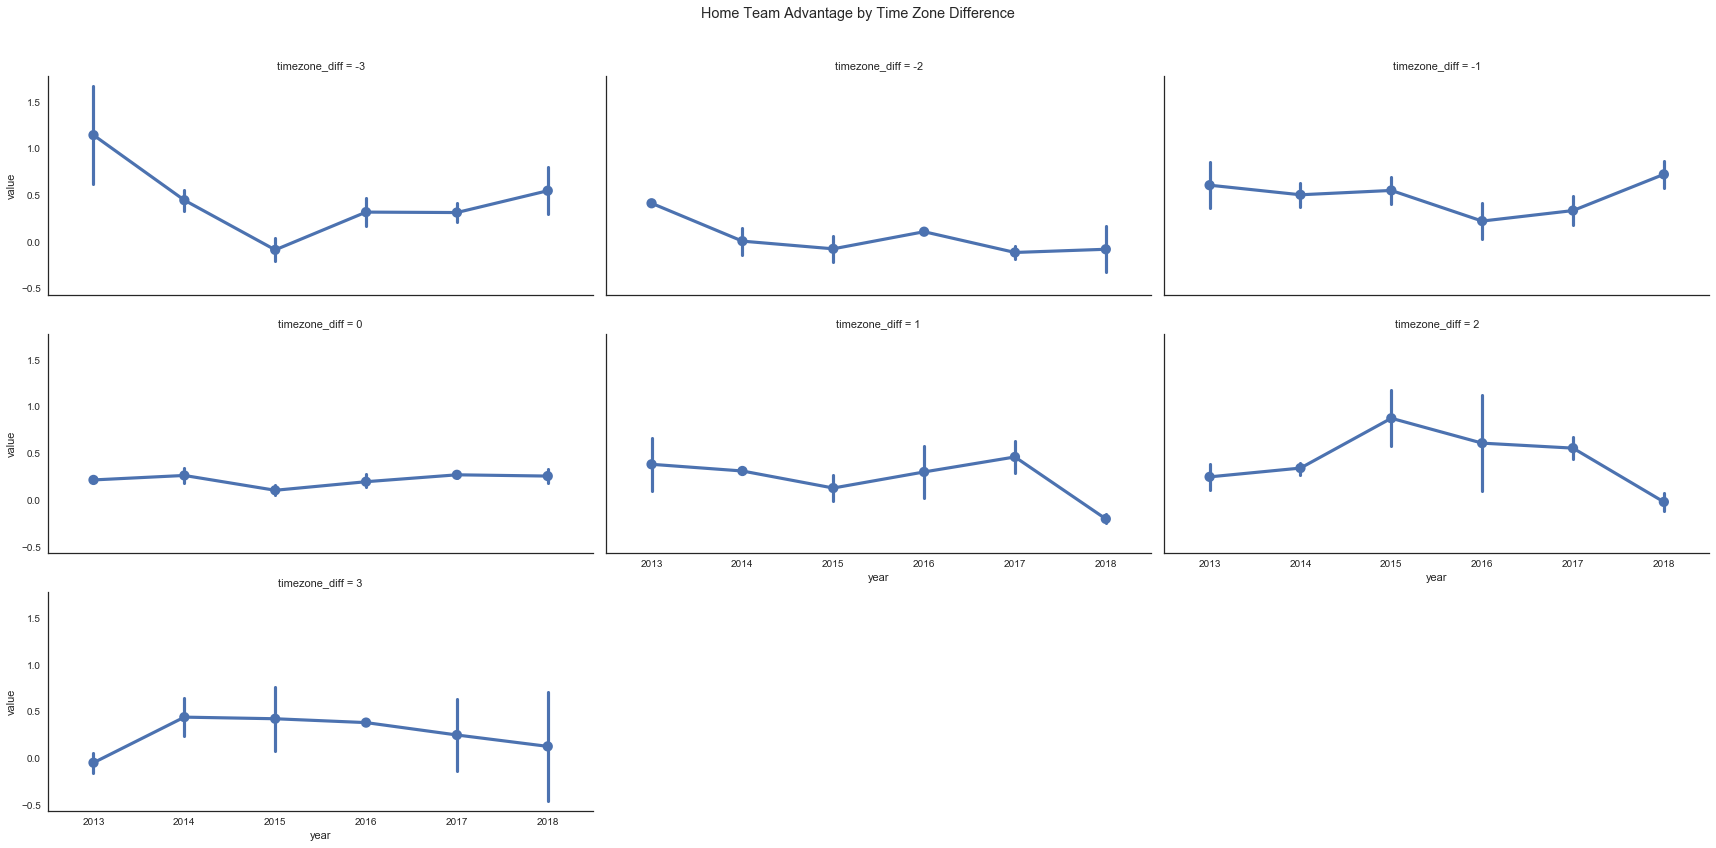

In [75]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, col = "timezone_diff", margin_titles=True, col_wrap=3,size=4, aspect=2)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Team Advantage by Time Zone Difference')
plt.savefig('figures/goal_differential_by_time_zone_diff.jpg')
pass

In [76]:
home_goals_by_team = goals_by_team[goals_by_team['home_team_id']==goals_by_team['team_id_for']]
away_game_plays_goals = goals_by_team[goals_by_team['away_team_id']==goals_by_team['team_id_for']]

In [77]:
#Split into home and away goals
home_game_plays_goals = game_plays_goals[game_plays_goals['home_team_id']==game_plays_goals['team_id_for']]
away_game_plays_goals = game_plays_goals[game_plays_goals['away_team_id']==game_plays_goals['team_id_for']]

In [78]:
home_game_plays_goals.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
122,2013020652_123,2013020652,123,27.0,20.0,Goal,Wrist Shot,-96.0,-9.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
129,2013020652_130,2013020652,130,27.0,20.0,Goal,Wrist Shot,-71.0,8.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
179,2013020652_180,2013020652,180,27.0,20.0,Goal,Wrist Shot,-72.0,-24.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
261,2013020652_262,2013020652,262,27.0,20.0,Goal,Wrist Shot,80.0,3.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
307,2013020652_308,2013020652,308,27.0,20.0,Goal,Slap Shot,51.0,-21.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [79]:
home_game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


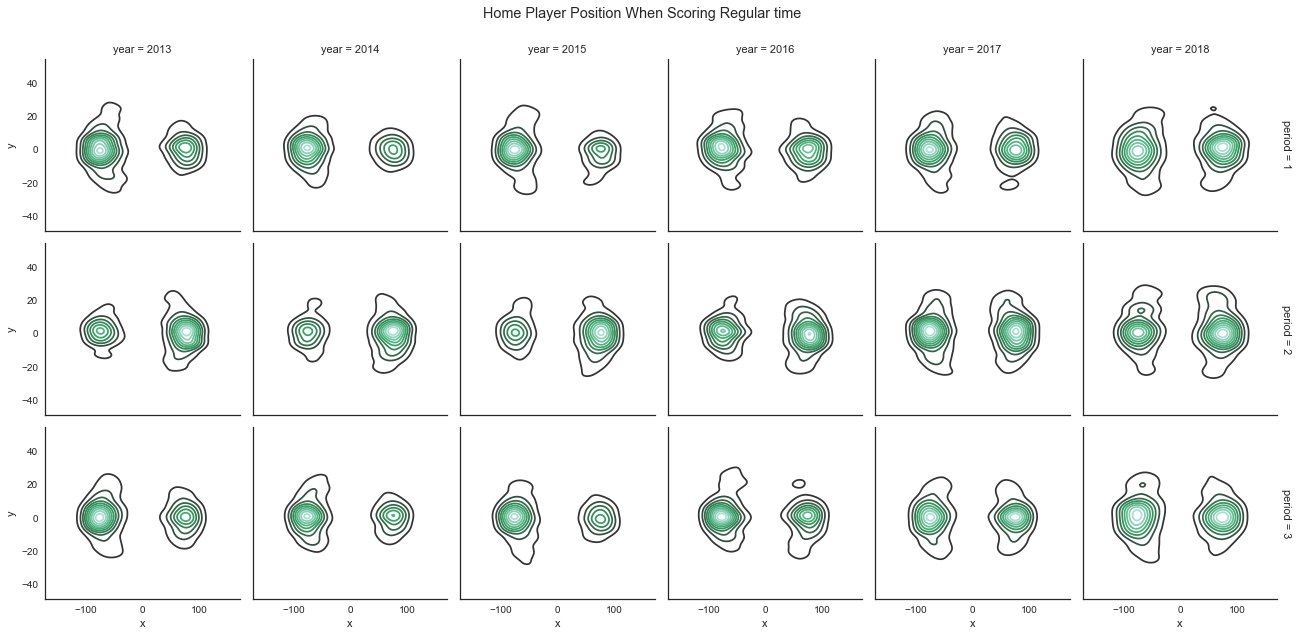

In [80]:
#Let's look at where all the Goals have occurred on the ice FOR HOME TEAM during regular play
home_reg_time = home_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(home_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Player Position When Scoring Regular time')
plt.savefig('figures/player_position_regular_scoring_kdeplot.jpg')
pass

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


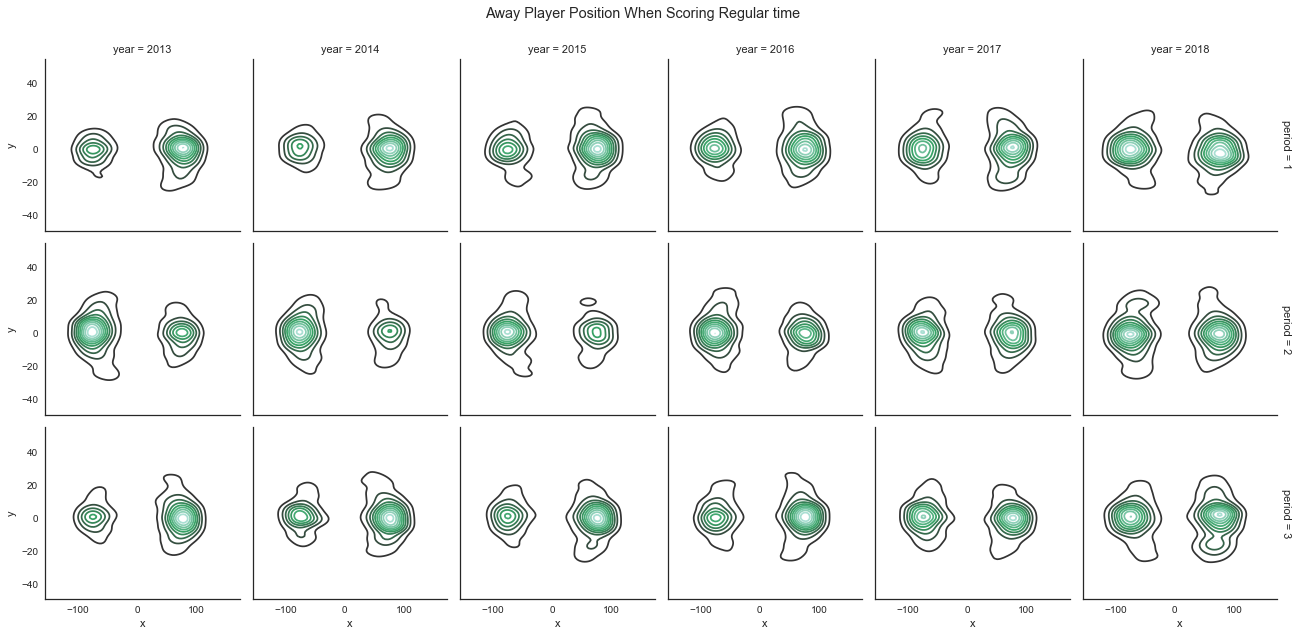

In [81]:
#Let's look at where all the Goals have occurred on the ice FOR AWAY TEAM
away_reg_time = away_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(away_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Away Player Position When Scoring Regular time')
plt.savefig('figures/away_player_position_regular_scoring_kdeplot.jpg')
pass

## Reimport data and modify for Section 1 analysis

In [2]:
game = pd.read_csv('data/game.csv')
game = game.set_index('game_id')
team_info = pd.read_csv('data/team_info.csv')
team_info = team_info.set_index('team_id')
#note that abbreviation_x = away, abbreviation_y = home, need to change column names
game = game.merge(team_info[['teamName']], left_on='away_team_id', right_on='team_id',right_index=True)
game = game.merge(team_info[['teamName']], left_on='home_team_id', right_on='team_id',right_index=True)
game.rename(columns={'teamName_x': 'away_team', 'teamName_y': 'home_team'}, inplace=True)
print(game.shape)
game.head()
#game_teams_stats = pd.merge(game_teams_stats, game[['type']], on = 'game_id')


(7441, 16)


,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,away_team,home_team
game_id,,,,,,,,,,,,,,,,
2012030221,20122013,P,2013-05-16,3,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2012030222,20122013,P,2013-05-19,3,6,2,5,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2012030225,20122013,P,2013-05-25,3,6,1,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2013020380,20132014,R,2013-11-29,3,6,2,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2012020179,20122013,R,2013-02-13,3,6,4,3,away win SO,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins


In [3]:
# create column in game df with binary home / away win; home win = 1, away = 0
game.loc[game['home_goals'] > game['away_goals'], 'side_won'] = int(1)
game.loc[game['home_goals'] < game['away_goals'], 'side_won'] = int(0)

# ensure date_time column to pandas date time and add month column
game['date_time'] = pd.to_datetime(game['date_time'])
game['month'] = game['date_time'].dt.month
game.head()

,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,away_team,home_team,side_won,month
game_id,,,,,,,,,,,,,,,,,,
2012030221,20122013,P,2013-05-16,3,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins,1.0,5
2012030222,20122013,P,2013-05-19,3,6,2,5,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins,1.0,5
2012030225,20122013,P,2013-05-25,3,6,1,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins,1.0,5
2013020380,20132014,R,2013-11-29,3,6,2,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins,1.0,11
2012020179,20122013,R,2013-02-13,3,6,4,3,away win SO,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins,0.0,2


In [4]:
#subset data for regular season and playoffs
reg_season = game[(game.type == 'R')]
playoffs = game[(game.type == 'P')]

## Data validation

In [5]:
#regular season data check
team_count = pd.Series([len(x) for x in reg_season.groupby(['season'])['home_team'].unique()])
game_count = pd.Series([x for x in reg_season['season'].value_counts()[::-1]])
team_count.index = pd.Index(reg_season.groupby(['season'])['home_team'].unique().index)
game_count.index = team_count.index
goals =  pd.Series(reg_season.groupby(['season'])['away_goals'].sum() \
                   + reg_season.groupby(['season'])['home_goals'].sum())
data_check = pd.DataFrame({'games':game_count,'teams':team_count, 'goals': goals})
data_check['games_per_team'] = data_check.games/(data_check.teams/2)
data_check['goals_per_game'] = data_check.goals/(data_check.games)
data_check['goals_per_team_per_game'] = data_check.goals_per_game/2

data_check

,games,teams,goals,games_per_team,goals_per_game,goals_per_team_per_game
season,,,,,,
20122013,720,30,3919,48.0,5.443056,2.721528
20132014,1230,30,6751,82.0,5.488618,2.744309
20142015,1230,30,6719,82.0,5.462602,2.731301
20152016,1230,30,6672,82.0,5.424390,2.712195
20162017,1230,30,6803,82.0,5.530894,2.765447
20172018,1271,31,7552,82.0,5.941778,2.970889


In [11]:
# playoff data check
team_count = pd.Series([len(x) for x in playoffs.groupby(['season'])['home_team'].unique()])
game_count = pd.Series([x for x in playoffs['season'].value_counts()[::-1]])
team_count.index = pd.Index(reg_season.groupby(['season'])['home_team'].unique().index)
game_count.index = team_count.index
goals =  pd.Series(playoffs.groupby(['season'])['away_goals'].sum() \
                   + playoffs.groupby(['season'])['home_goals'].sum())
p_data_check = pd.DataFrame({'games':game_count,'teams':team_count, 'goals': goals})
p_data_check['goals_per_game'] = data_check.goals/(data_check.games)
p_data_check['goals_per_team_per_game'] = data_check.goals_per_game/2
p_data_check

,games,teams,goals,goals_per_game,goals_per_team_per_game
season,,,,,
20122013,84,16,432,5.443056,2.721528
20132014,86,16,520,5.488618,2.744309
20142015,87,16,448,5.462602,2.731301
20152016,89,16,478,5.424390,2.712195
20162017,91,16,449,5.530894,2.765447
20172018,93,16,496,5.941778,2.970889


In [12]:
# null check
game.isnull().sum()

season                      0
type                        0
date_time                   0
away_team_id                0
home_team_id                0
away_goals                  0
home_goals                  0
outcome                     0
home_rink_side_start      116
venue                       0
venue_link                  0
venue_time_zone_id          0
venue_time_zone_offset      0
venue_time_zone_tz          0
away_team                   0
home_team                   0
side_won                    0
month                       0
dtype: int64

## Exploratory Analysis of Game Data

In [13]:
# of games in each season - regular season + playoffs; note 2012-2013 is shortened by lockout
games_by_season = game['season'].value_counts()
total_games = sum(games_by_season)
print(games_by_season)

print("Total games in data set:", "{:,}".format(total_games))

20172018    1355
20132014    1323
20152016    1321
20142015    1319
20162017    1317
20122013     806
Name: season, dtype: int64
Total games in data set: 7,441


In [14]:
# calc total home win percentage in data set
home_wins = game['side_won'].sum()
total_wins = game['side_won'].count()
home_win_pct = "{:.2%}".format(home_wins / total_wins)
print("Home win % in 2012-2013 through 2017-2018 seasons:", home_win_pct)

Home win % in 2012-2013 through 2017-2018 seasons: 54.95%


In [15]:
# calc total home win percentage playoffs vs. regular season
tot_reg = game[game.type == 'R'].count()["side_won"]
home_reg = game[(game.type == 'R') & (game.side_won == 1)].sum()["side_won"]
tot_po = game[game.type == 'P'].count()["side_won"]
home_po = game[(game.type == 'P') & (game.side_won == 1)].sum()["side_won"]
home_reg_win_pct = "{:.2%}".format(home_reg / tot_reg)
home_po_win_pct = "{:.2%}".format(home_po / tot_po)
print("Home regular season win pct: " + str(home_reg_win_pct) + ". Home playoff win pct: " \
      + str(home_po_win_pct))

Home regular season win pct: 54.84%. Home playoff win pct: 56.42%


In [16]:
home_pct_by_season = game.groupby(['season','type'])['side_won'].mean().unstack()
home_pct_by_season.columns = ['playoffs','regular']
home_pct_by_season

,playoffs,regular
season,,
20122013,0.686047,0.568056
20132014,0.602151,0.536585
20142015,0.573034,0.541463
20152016,0.505495,0.529268
20162017,0.540230,0.559350
20172018,0.476190,0.563336


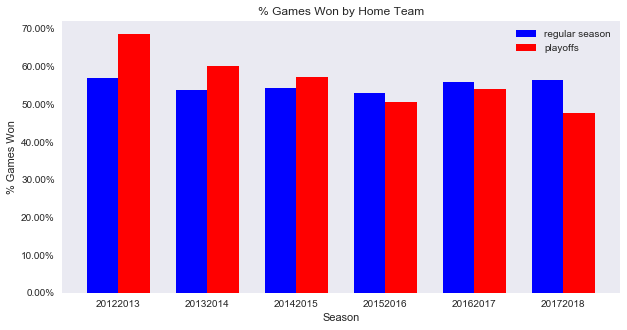

In [19]:
xbar_width = .35
y1 = home_pct_by_season['regular']
y2 = home_pct_by_season['playoffs']
xval= np.arange(len(home_pct_by_season))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('% Games Won by Home Team')
ax1.set_ylabel('% Games Won')
ax1.set_xlabel('Season')
ax1.set_xticks(xval)
ax1.set_xticklabels(home_pct_by_season.index)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

ax1.bar(xval-xbar_width/2,height=y1, width=xbar_width,color='b',label='regular season')
ax1.bar(xval+xbar_width/2,height=y2,width=xbar_width,color='r',label='playoffs')
ax1.legend()
ax1.grid(False)

pass


In [20]:
#goals scored home vs. away
home_goals_pg = reg_season['home_goals'].sum() / reg_season['home_goals'].count()
away_goals_pg = reg_season['away_goals'].sum() / \
            reg_season['home_goals'].count()
differential_pg = home_goals_pg - away_goals_pg
print("Home goals scored: " + str(home_goals_pg) + "\nAway goals scored: " \
      + str(away_goals_pg) + "\nDifferential: " + str(differential_pg))

Home goals scored: 2.9154970337143684
Away goals scored: 2.6431775430473157
Differential: 0.27231949066705274


In [21]:
#goals for and against by team (home goals scored - away goals scored; home goals given up vs. away goals given up)
#note negative goals against means gave up fewer goals at home than away
home_win_rate = pd.Series(reg_season.groupby(['home_team'])['side_won'].mean())
away_win_rate = pd.Series(1-reg_season.groupby(['away_team'])['side_won'].mean())

goals_for_by_team = pd.Series(reg_season.groupby(['home_team'])['home_goals'].mean() \
                              - reg_season.groupby(['away_team'])['away_goals'].mean())
goals_against_by_team = pd.Series(reg_season.groupby(['home_team'])['away_goals'].mean() \
                                  - reg_season.groupby(['away_team'])['home_goals'].mean())
total_goal_differential = goals_for_by_team - goals_against_by_team

goals_for_against = pd.DataFrame({'home_win_rate':home_win_rate,'away_win_rate':away_win_rate,
                                  'win_diff':home_win_rate-away_win_rate,'goals_for_diff':goals_for_by_team, 
                                  'goals_against_diff':goals_against_by_team, 
                                  'total':total_goal_differential, 
                                  'pct_offense': goals_for_by_team / total_goal_differential, 
                                  'pct_defense': -goals_against_by_team / total_goal_differential})
goals_for_against = goals_for_against.sort_values(by='win_diff',ascending=False)
goals_for_against.head()

,home_win_rate,away_win_rate,win_diff,goals_for_diff,goals_against_diff,total,pct_offense,pct_defense
Flyers,0.576419,0.384279,0.192140,0.305677,-0.484716,0.790393,0.386740,0.613260
Golden Knights,0.707317,0.536585,0.170732,0.536585,-0.536585,1.073171,0.500000,0.500000
Penguins,0.681223,0.519651,0.161572,0.506550,-0.301310,0.807860,0.627027,0.372973
Lightning,0.637555,0.480349,0.157205,0.414847,-0.174672,0.589520,0.703704,0.296296
Maple Leafs,0.537118,0.388646,0.148472,0.519651,-0.135371,0.655022,0.793333,0.206667


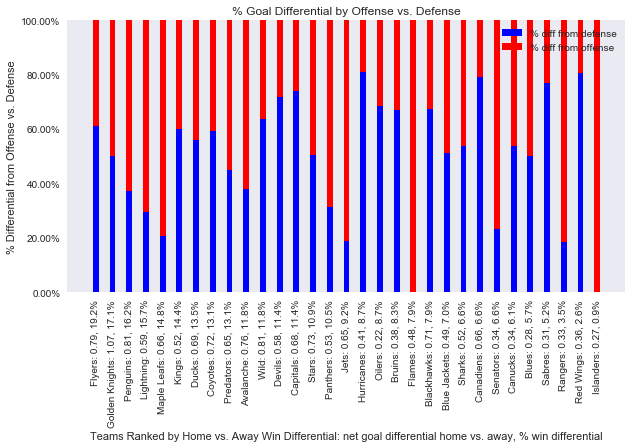

In [22]:
xbar_width = .35
y1 = goals_for_against['pct_offense']
y2 = goals_for_against['pct_defense']
xval= np.arange(len(goals_for_against))
xlab = [str(goals_for_against.index[i]) +': ' + str('{:.2f}'.format(goals_for_against['total'][i])) + ', ' \
        + str('{:.1%}'.format(goals_for_against['win_diff'][i])) \
        for i in range(len(goals_for_against.index))]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('% Goal Differential by Offense vs. Defense')
ax1.set_ylabel('% Differential from Offense vs. Defense')
ax1.set_xlabel('Teams Ranked by Home vs. Away Win Differential: net goal differential home vs. away, % win differential')
ax1.set_xticks(xval)
ax1.set_xticklabels(xlab,rotation=90)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

ax1.bar(xval,height=y2, width=xbar_width,color='b',label='% diff from defense')
ax1.bar(xval,height=y1, bottom=y2,width=xbar_width,color='r',label='% diff from offense')
ax1.legend()
ax1.grid(False)
plt.ylim(0,1)
pass

## Exploratory Analysis of Game Team Data


In [6]:
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
game_teams_stats = game_teams_stats.set_index('game_id')
#team_info = pd.read_csv('data/team_info.csv')
#team_info = team_info.set_index('team_id')
game_teams_stats.shape

(14882, 14)

In [7]:
game_teams_stats.isnull().sum()

team_id                   0
HoA                       0
won                       0
settled_in                0
head_coach                0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
dtype: int64

In [8]:
# join with game df to get regular season vs. playoffs, season and abbreviation
game_teams_stats = game_teams_stats.merge(game[['type', 'season']], on = 'game_id')
game_teams_stats = game_teams_stats.merge(team_info[['teamName']], on='team_id', right_index=True)
#get regular season only for ease
reg_season_stats = game_teams_stats[game_teams_stats['type']=='R']

game_teams_stats.head()

,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,type,season,teamName
game_id,,,,,,,,,,,,,,,,,
2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,P,20122013,Rangers
2012030222,3,away,False,REG,John Tortorella,2,37,33,11,5,0,51.7,1,4,P,20122013,Rangers
2012030223,3,home,False,REG,John Tortorella,1,24,37,2,2,0,38.2,7,9,P,20122013,Rangers
2012030224,3,home,True,OT,John Tortorella,4,32,40,8,4,1,46.3,9,7,P,20122013,Rangers
2012030225,3,away,False,REG,John Tortorella,1,29,25,13,2,1,50.9,5,3,P,20122013,Rangers


In [26]:
team_win_rate = reg_season_stats.groupby(['teamName','HoA'])['won'].mean()
team_win_df = team_win_rate.unstack()
team_win_df['diff'] = team_win_df['home'] - team_win_df['away']
#print(team_win_df)
team_win_series = team_win_df['diff'].sort_values(ascending=False)
team_win_series

team_win_df=team_win_df.sort_values(by='diff',ascending=False)


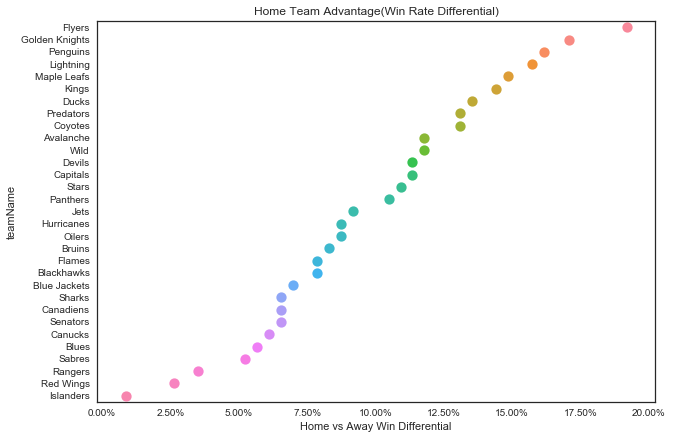

In [27]:
sns.set(style = 'white')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax = sns.pointplot(x=team_win_series, y=team_win_series.index, hue = team_win_series.index, join=False)
ax.set(xlabel='Home vs Away Win Differential', title = 'Home Team Advantage(Win Rate Differential)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.get_legend().set_visible(False)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
pass

In [28]:
def top_teams(num_teams):
    '''Returns list of top teams by number of wins. Parameter is number of teams returned'''
    seasons = {i:[] for i in game_teams_stats['season'].unique()}
    for i in seasons.keys():
        subdata = game_teams_stats[game_teams_stats.season == i]
        rankbyseason = subdata.won.groupby([subdata.teamName,]).sum().sort_values(ascending=False)
        seasons[i].extend(list(rankbyseason.index[:num_teams]))
    
    return seasons

In [29]:
def top_team_category(rankings, row):
    '''classifies team in row of pd dataframe into good and bad based on list of top teams'''
    if row['teamName'] in rankings[row['season']]:
        return 'good'
    else:
        return 'bad'

In [30]:
rankings = top_teams(10)
game_teams_stats['classifier'] = game_teams_stats.apply(lambda row: top_team_category(rankings, row),axis = 1)

In [31]:
diff_by_season = game_teams_stats.groupby(['season','classifier','HoA'])['won'].agg('mean').unstack()
diff_by_season['diff'] = diff_by_season['home'] - diff_by_season['away']
diff_by_season['check'] = diff_by_season['home'] + diff_by_season['away']
#diff_by_season['diff'].sort_values(ascending = False)
diff_by_season.index.unique(level='season')

Int64Index([20122013, 20132014, 20142015, 20152016, 20162017, 20172018], dtype='int64', name='season')

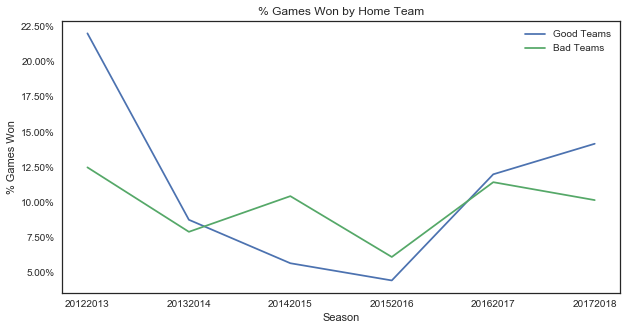

In [32]:
xbar_width = .35
y1 = pd.DataFrame(diff_by_season['diff'][:,'good'])
y2 = pd.DataFrame(diff_by_season['diff'][:,'bad'])
x = diff_by_season.index.unique(level='season')
xval= np.arange(len(x))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('% Games Won by Home Team')
ax1.set_ylabel('% Games Won')
ax1.set_xlabel('Season')
ax1.set_xticks(xval)
ax1.set_xticklabels(x)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)
ax1.plot(xval,y1,label='Good Teams')
ax1.plot(xval,y2,label='Bad Teams')
#ax1.plot(xval-xbar_width/2,height=y1, width=bar_width,color='b',label='regular season')
#ax1.plot(xval+xbar_width/2,height=y2,width=bar_width,color='r',label='playoffs')
ax1.legend()
#ax1.grid(False)

pass

## Powerplay Analysis


In [9]:
# % of total goals that are on power play
pplaygoal_pct = reg_season_stats['powerPlayGoals'].sum()/reg_season_stats['goals'].sum()
print('{:.2%}'.format(pplaygoal_pct) + ' total goals from PP')

21.53% total goals from PP


In [12]:
# estimating % of each game time is on powerplay
# assuming 1.5min average powerplay but may be different due to goals scored on pp or other penalties
pplayopp = reg_season_stats[reg_season_stats.season == 20172018]['powerPlayOpportunities'].sum()

games = int(data_check[data_check.index == 20172018]['games'])
print(str(pplayopp) + ' pp opportunities in 2017-2018 season')
print(str(games) + 'games in 2017-2018 season')
print('{:.2f}'.format(pplayopp/games) + ' pp per game in 2017-2018 season')
pptime = ((pplayopp/games) * 1.5)/60 
print('Est. ''{:.2%}'.format(pptime) +' of time per game on power play')

7735 pp opportunities in 2017-2018 season
1271games in 2017-2018 season
6.09 pp per game in 2017-2018 season
Est. 15.21% of time per game on power play


In [13]:
# home - away difference in number of power play opportunities per game
pplayopp_diff = reg_season_stats.groupby('HoA')['powerPlayOpportunities'].mean()[1]-reg_season_stats.groupby('HoA')['powerPlayOpportunities'].mean()[0]
print('{:.2f}'.format(pplayopp_diff) +' difference in pp opportunities per game')

0.28 difference in pp opportunities per game


In [42]:
# reg season power play conversion overall 
ppconv = reg_season_stats['powerPlayGoals'].sum()/reg_season_stats['powerPlayOpportunities'].sum()
print('{:.2%}'.format(ppconv) + ' conversion')

18.82% conversion


In [48]:
#est. goals per game from additional pp opportunities at home
pplaygoal_diff = pplayopp_diff * ppconv 
print('{:.2f}'.format(pplaygoal_diff) + ' goals per game')

0.05 goals per game


In [49]:
# est pp goal differential per game divided by total difference in home vs. away goals per game
# equiv to % of total home vs. away goal variance explained by pp opportunities
diff_expl_pp = pplaygoal_diff / differential_pg
print('{:.2%}'.format(diff_expl_pp) + ' explained by pp opportunity diff')

19.41% explained by pp opportunity diff


In [50]:
# est pp conv at home
home_ppconv = reg_season_stats[(reg_season_stats.HoA =='home')]['powerPlayGoals'].sum()\
    /reg_season_stats[(reg_season_stats.HoA =='home')]['powerPlayOpportunities'].sum()
home_ppconv
print('{:.2%}'.format(home_ppconv) + ' home pp conversion')

19.55% home pp conversion


In [51]:
# est pp conv away
away_ppconv = reg_season_stats[(reg_season_stats.HoA =='away')]['powerPlayGoals'].sum()\
    /reg_season_stats[(reg_season_stats.HoA =='away')]['powerPlayOpportunities'].sum()
print('{:.2%}'.format(away_ppconv) + ' away pp conversion')

18.02% away pp conversion


## Faceoff Analysis

In [53]:
fo_diff = reg_season_stats.groupby('HoA')['faceOffWinPercentage'].mean()
fo_diff

HoA
away    48.328274
home    51.671726
Name: faceOffWinPercentage, dtype: float64

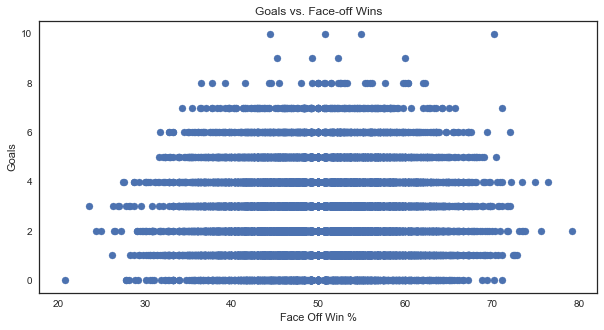

In [54]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('Goals vs. Face-off Wins')
ax1.set_ylabel('Goals')
ax1.set_xlabel('Face Off Win %')
ax1.scatter(reg_season_stats['faceOffWinPercentage'],reg_season_stats['goals'] )
pass